# Gold Recovery Prediction Modeloject

## Purpose

The purpose of this project is to develop a prototype for a machine learning model for Zyfra that predicts the amount of gold recovered from gold ore.

## Table of Contents
<a href='#General Data Information and Preprocessing'>General Data Information and Preprocessing</a>

<a href='#Recovery Calculation Check'>Recovery Calculation Check</a>

<a href='#Test Dataset Missing Features'>Test Dataset Missing Features</a>

<a href='#Data Preprocessing'>Data Preprocessing</a>

<a href='#Data Analysis'>Data Analysis</a>

<a href='#Metal Concentration Analysis'>Metal Concentration Analysis</a>

<a href='#Recovery Analysis'>Recovery Analysis</a>

<a href='#Feed Particle Size Analysis'>Feed Particle Size Analysis</a>

<a href='#Outliers'>Outliers</a>

<a href='#Model Development'>Model Development</a>

<a href='#Evaluation Criteria'>Evaluation Criteria</a>

<a href='#Model Training'>Model Training</a>

<a href='#Model Testing'>Model Testing</a>

<a href='#Overall Conclusion'>Overall Conclusion</a>

<a id='General Data Information and Preprocessing'></a>
## General Data Information and Preprocessing

Initially, a general look at the data is performed and the necessary sklearn modules are imported. Since the target attribute is numerical, regression modules are imported for Decision Tree, Random Forest, and Linear Regression.

In [25]:
#Import necessary libraries and modules
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train.csv')
gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test.csv')
gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full.csv')

gold_data = [gold_recovery_train, gold_recovery_test, gold_recovery_full]

for entry in gold_data:
    entry.info()
    print('')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [3]:
gold_recovery_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
gold_recovery_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
gold_recovery_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


From the initial look at the data, it can be seen that numerous attributes in all three datasets have varying numbers of missing values. Another important observation is that the `gold_recovery_test` dataset is missing 34 columns that are present in the other two datasets. All of the columns with the exception of the `date` column are float64. These issues will be addressed later on when preprocessing the data.

<a id='Recovery Calculation Check'></a>
### Recovery Calculation Check

To verify that recovery attributes in the datasets are calculated correctly, a sample calculation recovery calculation is done for the rougher concentrate stage, using the available inputs and outputs for this stage. The equation for recovery is:

**recovery = (C x (F-T))/(F x (C-T)) * 100%**

where, for this specific stage:

C = Share of gold in the concentrate right after flotation   
F = Share of gold in the feed before flotation  
T = Share of gold in the rougher tails right after flotation  

The calculated recovery value for each time stamp will be compared to the value in the `rougher.output.recover` attribute to calculate the mean absolute error (MAE).

In [6]:
#Assigns appropriate attributes to the variables in the recovery equation
c = gold_recovery_train['rougher.output.concentrate_au']
f = gold_recovery_train['rougher.input.feed_au']
t = gold_recovery_train['rougher.output.tail_au']

#Creates new column for the calculated recovery value
gold_recovery_train['rougher.output.recovery_calculated'] = (c*(f-t))/(f*(c-t))*100

#Drops missing values in recovery and calculated recovery column so that the MAE method will work
gold_recovery_mae_values = gold_recovery_train.dropna(subset=['rougher.output.recovery', 'rougher.output.recovery_calculated'])
rougher_output_recovery_mae = mean_absolute_error(gold_recovery_mae_values['rougher.output.recovery'], gold_recovery_mae_values['rougher.output.recovery_calculated'])

print('The MAE between the provided recovery value for the rougher output stage vs. the calculated value is {:.2e}.'.format(rougher_output_recovery_mae))

#Drops the calculated recovery column to avoid issues in further data analysis
#gold_recovery_train.drop(['rougher.output.recovery_calculated'], inplace=True)

The MAE between the provided recovery value for the rougher output stage vs. the calculated value is 9.44e-15.


With a miniscule MAE, it can be assumed that the `rougher.output.recovery` attribute is correctly calculating the recovery value. 

<a id='Test Dataset Missing Features'></a>
### Test Dataset Missing Features

From the initial look at the data, it was previously observed that the `gold_recovery_test` dataset had several missing columns that were present in the other two datasets. The missing columns are determined and evaluated to better understand why they are missing.

In [7]:
#Returns a list of columns that aren't in the test dataset
missing_test_features = list((Counter(gold_recovery_train.columns) - Counter(gold_recovery_test.columns)).elements())

missing_test_features

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

The missing columns in the test dataset are all a form of output, with the exception of four calculations. These missing parameters are similar to the two targets of the dataset: `rougher.output.recovery` and `final.output.recovery`, in that they can be used to calculate the recovery. These parameters are not needed since these are closely related to the predicted values of the model.

<a id='Data Preprocessing'></a>
### Data Preprocessing

For the training and testing datasets, a few things must be done to ensure the datasets are in a working condition: change the `date` data type from object to datetime; create a list of the usable features in the training dataset, and fill in the missing values.

**Date Type Change**

In [8]:
#Train dataset
gold_recovery_train['date'] = pd.to_datetime(gold_recovery_train['date'])

#Test dataset
gold_recovery_test['date'] = pd.to_datetime(gold_recovery_test['date'])

**Usable features**

Since the testing dataset only contains a portion of the features that the training dataset contains, the model should only be trained on the features that appear in both datasets.

In [9]:
all_columns = list(set(gold_recovery_train.columns) | set(gold_recovery_test.columns))
all_targets = [col for col in all_columns if 'recovery' in col]

usable_features = list(set(gold_recovery_train.columns) & set(gold_recovery_test.columns) - set(all_targets))

**Missing Values**

Since the data entries are sequentially taken by the hour, and there aren't drastic changes over time for many of the parameters, missing values can be filled in by taking adjacent data points using forward fill or backfill. Forward fill is utilized in this case.

In [10]:
#Training dataset
gold_recovery_train.fillna(method = 'ffill', inplace = True)

#Testing dataset
gold_recovery_test.fillna(method = 'ffill', inplace = True)

With the recovery attributes verified, the missing features in the testing dataset better understood, and all the data preprocessed, further data analysis can be completed.

<a id='Data Analysis'></a>
## Data Analysis
<a id='Metal Concentration Analysis'></a>
### Metal Concentration Analysis

To begin the data analysis, the concentrations of the three different metals are evaluated over the course of the extraction process. The concentrations are graphed for each metal for each of the 3 stages of the extraction process: the rougher output stage, primary cleaning output stage, and the final output stage.

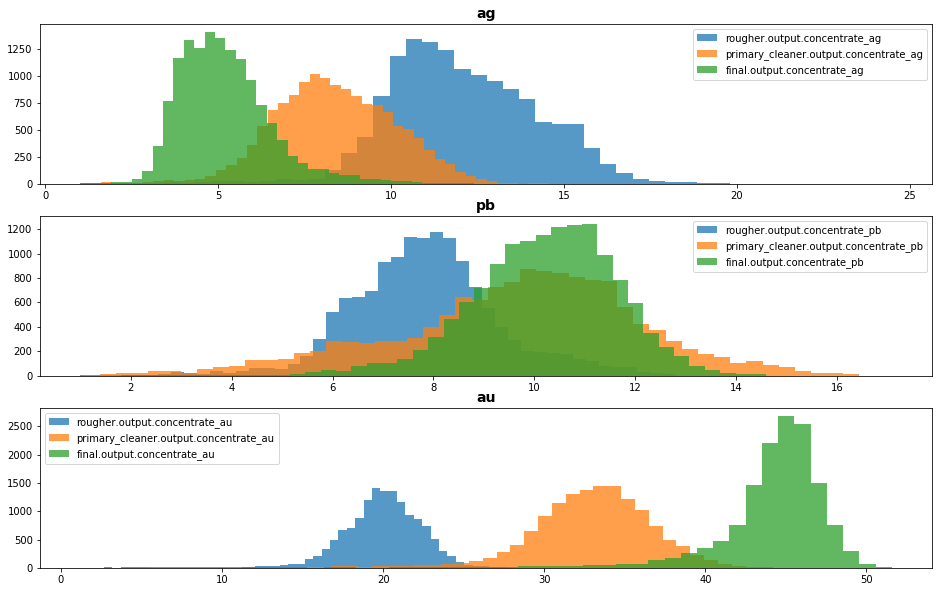

In [26]:
#Creates list of the 3 metals and 3 stages
elements = ['ag', 'pb', 'au']
stages = ['rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_']

##Plots a figure for each element, with each of the three stages being shown on one plot
fig = plt.figure(figsize = (16,10))
for i, element in enumerate(elements):
    for stage in stages:
        plt.subplot(3,1, i+1)
        plt.hist(gold_recovery_train[stage + element], bins = 50, label = stage+element, alpha=0.75)
    plt.title(element, fontdict={'fontsize': 14, 'fontweight':'bold'})
    plt.legend()
    
plt.show()

The following observations are noted:
- Silver has the highest concentration at the beginning of the extraction process and depletes to nearly half the initial concentration by the end of the extraction
- Lead concentration increases slightly during the flotation stage, but then maintains its concentration fairly uniformly in the remaining stages.
- Gold concentration increases steadily during the entire extraction process
- For all the metals, there are a fair amount of data points that have very low values of concentration (~0). This is expected to be an error in the data, or a fault in the extraction process.

<a id='Recovery Analysis'></a>
### Recovery Analysis

Next the recovery values will be compared between the flotation stage and the final stage.

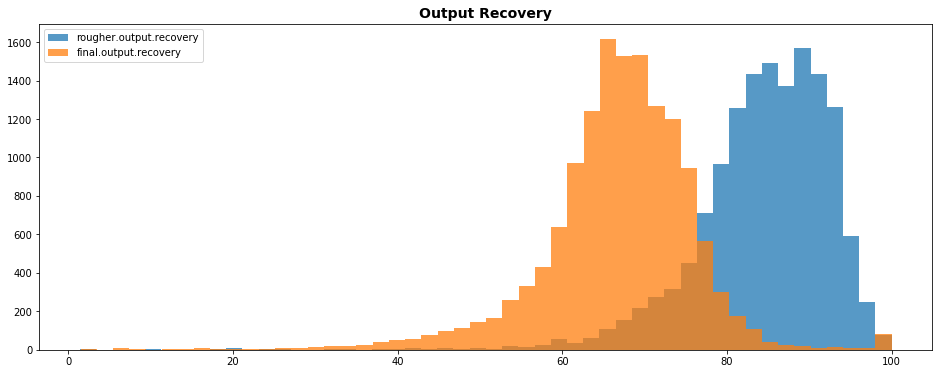

In [27]:
#Creates a graph showing the two different stages of recovery values 
fig2 = plt.figure(figsize = (16,6))
for i, stage in enumerate(['rougher.output.recovery', 'final.output.recovery']):
    plt.subplot(1,1, 1)
    plt.hist(gold_recovery_train[stage], bins = 50, label = stage, alpha=0.75)
    plt.title('Output Recovery', fontdict={'fontsize': 14, 'fontweight':'bold'})
    plt.legend()
    
plt.show()

From the two plots of the recovery value, it can be seen that the flotation stage results in a greater recovery than the final stage of the extraction process. This is expected since there is initially a greater amount of unwanted byproduct that is separated during the flotation stage. With the unwanted byproduct removed, there is less refining to do in the remaining extraction stages. There are a few instances of 0 recovery that are likely due to the 0 concentration instances in the previous plots.
<a id='Feed Particle Size Analysis'></a>
### Feed Particle Size Analysis

To ensure the testing dataset is representative of the training dataset, the distribution of the feed particle sizes are compared for the flotation stage and first stage of the cleaning process.

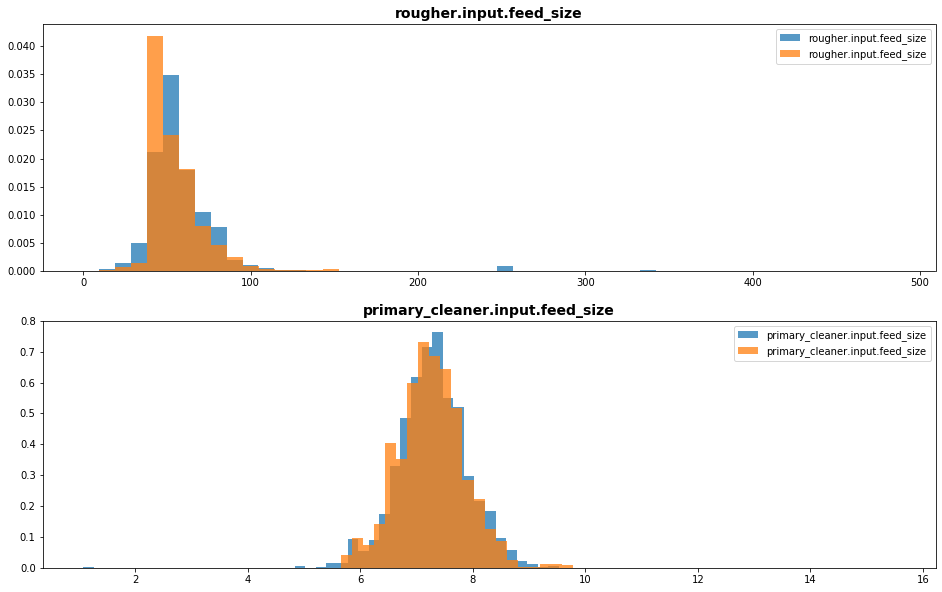

In [13]:
#Creates a density histogram for the feed size for two different stages
fig3 = plt.figure(figsize = (16,10))
for i, stage in enumerate(['rougher.input.feed_size', 'primary_cleaner.input.feed_size']):
    plt.subplot(2,1, i+1)
    plt.hist(gold_recovery_train[stage], bins = 50, label = stage, alpha=0.75, density=True)
    plt.hist(gold_recovery_test[stage], bins=50, label = stage, alpha=0.75, density=True)
    plt.title(stage, fontdict={'fontsize': 14, 'fontweight':'bold'})
    plt.legend()
    
plt.show()

For the flotation stage, the feed size distribution is fairly similar with the exception of a large spike in one of the datasets. However, for the first stage of the cleaning process, the distribution between the two datasets is nearly identical. Based on this, the data distribution is similar enough to proceed.

<a id='Outliers'></a>
### Outliers

As observed in the plots of the metal concentrations at varying stages, there were some unusual concentrations close to 0 that seemingly resulted in recovery values of 0 as well. Since these entries could potentially be mistakes and provide little benefit to the model for predicting recovery values, they will be removed from the data samples.

In [14]:
#Changes concentrate values less than 1 for each metal in each stage to NaN for removal
for stage in stages:
    for element in elements:
        gold_recovery_train[gold_recovery_train[stage+element] < 1] = np.nan

#Changes recovery values less than 1 for each stage to NaN for removal
gold_recovery_train[gold_recovery_train[['rougher.output.recovery', 'final.output.recovery']] < 1] = np.nan        

gold_recovery_train.dropna(inplace = True)

In [15]:
#Full dataset needs fixed in order to remove low recovery outputs from the test dataset
gold_recovery_full['date'] = pd.to_datetime(gold_recovery_full['date'])

gold_recovery_test = gold_recovery_test.merge(gold_recovery_full[['date', 'rougher.output.recovery', 'final.output.recovery']], how='left', on='date' )

gold_recovery_test[gold_recovery_test[['rougher.output.recovery', 'final.output.recovery']] < 1] = np.nan       

gold_recovery_test.dropna(inplace = True)

With some initial data analysis completed to ensure accuracy between the training and testing datasets, as well as removal of outliers in the data, the model development can now be performed.

<a id='Model Development'></a>
## Model Development
<a id='Evaluation Criteria'></a>
### Evaluation Criteria

Prior to developing and training the model, several functions are created in order to evaluate the effectiveness of the model. The symmetric Mean Absolute Percentage Error (sMAPE) will be used to evaluate the model. The sMAPE will be calculated for the flotation stage as well as the final output stage. The final sMAPE will be determined by taking the summation of 25% of the flotation stage and 75% of the final output stage. A function is created for the sMAPE of each of the two stages, as well as a final sMPAE for the combination of the two. In addition, since the sMPAE is not a typical scoring metric with a preset method, a function is created to score each model iteration.

In [16]:
#This function takes the targets and predictions from the model and calculates the mean sMPAE. sMPAE is output as a percent
def sMPAE(target, prediction):
    smpae = (abs(target - prediction)/((abs(target) + abs(prediction))/2)).mean()*100
    return smpae

#This function takes the targets and predictions from the combined dataset for the flotation and final stage and calculates
#the sMPAE for each from the sMPAE function. These values are then used to calculate the final sMPAE
def final_sMPAE(target, prediction):
    smpae_rougher = sMPAE(target[:,0], prediction[:,0])
    smpae_final = sMPAE(target[:,1], prediction[:,1])
    final_smpae = 0.25*smpae_rougher + 0.75*smpae_rougher
    return final_smpae

#This function takes in the model and makes it a scoring criteria for the model. Then model is then cross-validated
#and scored using the final sMPAE function
def cross_val_eval(model):
    final_smpae_score = make_scorer(final_sMPAE)
    model_score = cross_val_score(model, features_train, target_train, cv=5, scoring = final_smpae_score)
    #print('The final mean sMPAE for all five cross-validation samples is {:.2f}%.'.format(model_score.mean()))
    return model_score.mean()

#This function is the exact same as the cross_val_eval except that is uses the testing dataset
def cross_val_eval_test(model):
    final_smpae_score = make_scorer(final_sMPAE)
    model_score = cross_val_score(model, features_test, target_test, cv=5, scoring = final_smpae_score)
    return model_score.mean()

<a id='Model Training'></a>
### Model Training

To begin training the models, the targets and features are selected for the training and testing datasets. As mentioned in the previous sections, only features that appear in both the training and testing dataset are used for training the model, the `usable_features`.

In [17]:
#Targets for each dataset
target_train = gold_recovery_train[['rougher.output.recovery', 'final.output.recovery']].values
target_test = gold_recovery_test[['rougher.output.recovery', 'final.output.recovery']].values

#Features for each dataset - only ones in the usable data with the exception of date as it doesn't affect the targets
features_train = gold_recovery_train[usable_features].drop('date', axis=1)
features_test = gold_recovery_test[usable_features].drop('date', axis=1)

Three types of models will be evaluated: linear regression, decision tree, and random forest. For the decision tree and random forest models, the `n_estimators` and `max_depth` hyperparameters will be varied in order to determine the best model. A dataframe is created to hold the score of each model iteration.

In [18]:
model_smpae_scores = pd.DataFrame(columns = ['Model Type','Max Tree Depth', 'Number of Trees', 'final_smpae_score'])

**Linear Regression**

In [19]:
#Creates linear regression model
lr_model = LinearRegression()

#Uploads model smpae score to scores dataframe
model_smpae_scores.loc[len(model_smpae_scores.index)] = ['Linear Regression', '-', '-', cross_val_eval(lr_model)]

**Decision Tree**

In [20]:
#Loops through various model tree depths and adds scores to scores dataframe
for depth in range(2,9):
    dt_model = DecisionTreeRegressor(max_depth = depth, random_state=12345)    
    model_smpae_scores.loc[len(model_smpae_scores.index)] = ['Decision Tree', depth, '-', cross_val_eval(dt_model)]

**Random Forest**

In [21]:
#Loops through various model tree depths and number of trees and adds scores to scores dataframe
for trees in range(10, 31, 10):
    for depth in range(4, 7, 2):
        rf_model = RandomForestRegressor(n_estimators = trees, max_depth = depth, random_state=12345)        
        model_smpae_scores.loc[len(model_smpae_scores.index)] = ['Random Forest', depth, trees, cross_val_eval(rf_model)]

In [22]:
#Prints the model parameters with the best final smpae_score
best_model = model_smpae_scores[model_smpae_scores.final_smpae_score == model_smpae_scores.final_smpae_score.min()]
best_model

,Model Type,Max Tree Depth,Number of Trees,final_smpae_score
12,Random Forest,4,30,6.661813


The best model out of the model types and hyperparameters evaluated was a random forest model with a `max_depth` of 4, and a `n_estimators` of 30. This model will be tested on the testing dataset. It is noted that further iterations of random forest models could be performed, but the time spent running these models is not expected to outweigh the increased effectiveness. 

<a id='Model Testing'></a>
### Model Testing

In [23]:
rf_model_test = RandomForestRegressor(n_estimators = 30, max_depth = 4, random_state=12345)
print('The final sMPAE for all five cross-validation samples on the testing dataset utilizing the most effective machine learning model is {:.2f}%.'.format(cross_val_eval_test(rf_model_test)))

The final sMPAE for all five cross-validation samples on the testing dataset utilizing the most effective machine learning model is 4.49%.


The chosen model actually performed better on the testing dataset and had a final sMPAE of 4.44%.

<a id='Overall Conclusion'></a>
## Overall Conclusion

The purpose of this project was to develop a prototype for a machine learning model for Zyfra that predicts the amount of gold recovered from gold ore. The model was developed and trained from existing data for various stages and parameters of the gold extraction process.

The data was preprocessed and verified as correct, and was initially studied to get a better understanding of how concentrations of the core metals involved in the extraction process change over time. It was discovered that there were several anomaly data points that had zero concentration of the main metals. These data points were removed since they did not benefit the model.

For evaluation of the various models, several functions were created that allowed for the model to be scored based on the sMPAE between the predicted targets and the actual targets. Various iterations of three model types (linear regression, decision tree, and random forest) were trained via cross-validation and scored, with an iteration of a random forest model proving to be the most effective. This model was then tested on the testing dataset and resulted in a sMPAE of 4.44% for predicted recovery values for the gold ore extraction process. Although an acceptable criteria for sMPAE was not provided, the resulting value is expected to provide a reliable, effective machine learning model for future use.